<a href="https://colab.research.google.com/github/Hari-0708/ml_models/blob/main/liver_disease_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


In [4]:
data = pd.read_csv('indian_liver_patient.csv')

In [5]:
# Peek the dataset
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
# Dimension of the dataset
data.shape

(583, 11)

In [13]:
#  Checking for missing values
print(data.isnull().values.any())
data.isnull()

False


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False,False


In [12]:
 # Removing Missing values or Replacing it
data.dropna(inplace=True)

In [21]:
# Changing the numerical value into categorical data.
data['Gender'].replace({"Male": 1, "Female": 2}, inplace=True)

In [22]:
# Peeking the dataset
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,2,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
# Summary of the dataset
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [15]:
# Corrleation in the dataset
data.corr(method='pearson')

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,0.011000,0.006784,0.078878,-0.087799,-0.020499,-0.186248,-0.264211,-0.216408,-0.133164
Total_Bilirubin,0.011000,1.000000,0.874481,0.205739,0.213375,0.237323,-0.007906,-0.222087,-0.206267,-0.220218
Direct_Bilirubin,0.006784,0.874481,1.000000,0.234008,0.233180,0.257022,0.000033,-0.228409,-0.200125,-0.246273
Alkaline_Phosphotase,0.078878,0.205739,0.234008,1.000000,0.124777,0.166580,-0.027062,-0.163419,-0.234166,-0.183363
Alamine_Aminotransferase,-0.087799,0.213375,0.233180,0.124777,1.000000,0.791862,-0.042432,-0.028658,-0.002375,-0.163117
Aspartate_Aminotransferase,-0.020499,0.237323,0.257022,0.166580,0.791862,1.000000,-0.025751,-0.084915,-0.070040,-0.151834
Total_Protiens,-0.186248,-0.007906,0.000033,-0.027062,-0.042432,-0.025751,1.000000,0.783112,0.234887,0.033614
Albumin,-0.264211,-0.222087,-0.228409,-0.163419,-0.028658,-0.084915,0.783112,1.000000,0.689632,0.159770
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131
Dataset,-0.133164,-0.220218,-0.246273,-0.183363,-0.163117,-0.151834,0.033614,0.159770,0.163131,1.000000


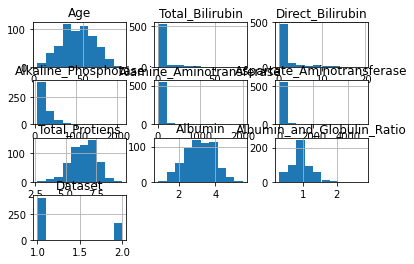

In [16]:
# Data Visualization
from matplotlib import pyplot
data.hist()
pyplot.show()

In [43]:
# Splitting the dataset

d = data.values
x_array = d[:, 0:10]
y_array = d[:, 10]

x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size=0.3, random_state=0)


In [44]:
# Model Building

lg = LogisticRegression(solver='lbfgs', max_iter=1000)
lg.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

In [45]:
# Getting the Prediction value

y_pred = lg.predict(x_test)


In [46]:
# Checking the error and accuracy

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.5519037064102988

In [47]:
# Evaluating the accuracy

if rmse >= 0.2 and rmse <= 0.5:
  print("Your Model has a greater accuracy.")
else:
  print("Your Model has a lower accuracy. Reevaluate your model!!!")
  # Go and ReDo the model building process with higher training data.
  # Train the model with it.
  # Again test the model with multiple data.

Your Model has a lower accuracy. Reevaluate your model!!!
